<h1 style='color:skyblue; text-align:center'> Plotting Spectrophotometric Data</h1>

<h2 style='color:lightblue; text-align:center'> Setting up libraries etc</h2>

In [1]:
## Plots the time evolition of triplet lifetime. PartWise analysis.
# from time import perf_counter
# t0 = perf_counter()
# import sys
import numpy as np
import pandas as pd
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib
# from scipy.signal import find_peaks
from os import path
from glob import glob
# import os
# import argparse
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
from scipy.optimize import curve_fit

In [3]:
%matplotlib ipympl

In [4]:
## ----------------------------------- matplotlib RC etc -----------------------------------------
# rc('figure', autolayout=True, figsize=[10, 6], dpi=75, titlesize=20 )
rc('figure', figsize=[10, 6], dpi=75, titlesize=20 )
rc('font', family='monospace')
rc('axes', titlesize=20, titleweight='heavy', labelsize=16, labelweight='bold')
rc(('xtick', 'ytick'), labelsize = 18)
rc('legend', fontsize=14)
rc('lines', linewidth=2.5)
rc('mathtext', default = 'regular')
rc('xtick.minor', visible = False, size = 6)
rc('ytick.minor', visible = True, size = 8)
# plt.rcParams['figure.constrained_layout.use'] = True
# rc('axes.formatter', limits=[-1, 1])
np.set_printoptions(formatter={'float': lambda x: f"{x:10.4g}"})

In [5]:
# rc('figure.constrained_layout', use=False) # doesnt work

In [6]:
## ----------------------------------------- directory -----------------------------------------
output_dir = '/home/sarthak/my_projects/argset/'
data_dir = '/home/sarthak/my_projects/argset/data/spectrophotometer_measurements/2025-01-30/'
# test_filename = 'pen_argset_A_centre_front.txt'

<h2 style='color:lightblue; text-align:center;'> function definitions </h2>

In [7]:
def f_gauss(x, f_mean, f_sigma, f_k):
    return f_k*(1/(f_sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-f_mean)/f_sigma)**2)

In [8]:
def red_chisq(f_obs, f_exp, fittedparameters):
    chisqr = np.sum((f_obs - f_exp)**2 / f_exp)
    ndf = f_obs.shape[0]
    return chisqr/(ndf -fittedparameters.shape[0])

In [9]:
def save_plot(fig:matplotlib.figure.Figure, file_name: str):
    fig.savefig(path.join(output_dir, f'{file_name}.pdf'))

def create_fig_with_inset(fig_number:int):
    fig, ax = plt.subplots(num=fig_number, figsize=[14,11]);
    ax.grid()
    # ax.set_ylim(-500, 400)
    ax.set_ylim(0, 400)
    ax.set_xlim(185, 600)
    ax.set_xlabel('Wavelength [nm]', fontsize=20)
    ax.set_ylabel('Reflection + Fluorescence [%]', fontsize=20)
    ax_inset = inset_axes(ax, width="50%", height="50%", loc='center',
                        bbox_to_anchor=(-0.05, 0.15, 1, 1), 
                        bbox_transform=ax.transAxes);
    ax_inset.tick_params(axis='x', rotation=-15)
    ax_inset.set_ylim(80, 160)
    # ax_inset.set_ylim(0, 400)
    ax_inset.set_xlim(185, 200)
    ax_inset.grid()
    return fig, ax, ax_inset

def add_line(fig, ax, ax_inset, datafile:pd.DataFrame, line_label:str, colorstr:str='magenta'):
    ax.plot(datafile['wavelength'], datafile['R'], color=colorstr, label=line_label)
    ax_inset.plot(datafile['wavelength'], datafile['R'], color=colorstr)
    ax.legend()

In [10]:
## ----------------------------------------- Pattern search -----------------------------------------
filename_pattern = '*.txt'
datafile_path_ls = glob(path.join(data_dir, filename_pattern))

for index, file_path in enumerate(datafile_path_ls):
    print(index, file_path.split(sep='/')[-1])

0 pen_argset_A_back_corner1_01_pressed.txt
1 no_sample_attempt1.txt
2 pen_teonex_Q51_old_spot1.txt
3 pen_argset_A_front_corner3.txt
4 pen_argset_A_front_corner4.txt
5 pen_argset_otherB_front_spot1.txt
6 2pac_esrtpb_3.txt
7 2pac_esrtpb_4.txt
8 PEN_Q53_UZH_spot2.txt
9 pen_argset_A_front_corner3_02.txt
10 pen_argset_C_TopSurface_centre.txt
11 pen_argset_C_BottomSurface_corner2.txt
12 pen_argset_A_TopSurface_corner1.txt
13 PEN_Q51_50um_argset_commissioning_22042024_attempt3.txt
14 pen_argset_B_back_corner4_gentlePress.txt
15 pen_argset_A_BottomSurface_corner1.txt
16 pen_argset_A_centre_front.txt
17 pen_argset_C_TopSurface_corner1.txt
18 pen_argset_A_front_corner2.txt
19 reference_BaSO4_test_1.txt
20 pen_argset_C_BottomSurface_corner4.txt
21 pen_argset_C_BottomSurface_corner3.txt
22 PEN_Q51_50um_argset_commissioning_22042024_attempt2.txt
23 pen_argset_B_back_spot1.txt
24 PEN_Q53_UZH_spot3.txt
25 pen_argset_B_centre_front.txt
26 2pac_esrtpb_5.txt
27 2pac_esrtpb_2.txt
28 pen_argset_A_TopSurfa

In [11]:
!mv ../data/spectrophotometer_measurements/2025-01-30/pen_argset_A_back_corner1_02_wrinkled.txt ../data/spectrophotometer_measurements/2025-01-30/not_in_use/pen_teonex_Q51_old_spot2_dent.txt

mv: cannot stat '../data/spectrophotometer_measurements/2025-01-30/pen_argset_A_back_corner1_02_wrinkled.txt': No such file or directory


<h2 style='color:gray; text-align:center'> Test Plot</h2>

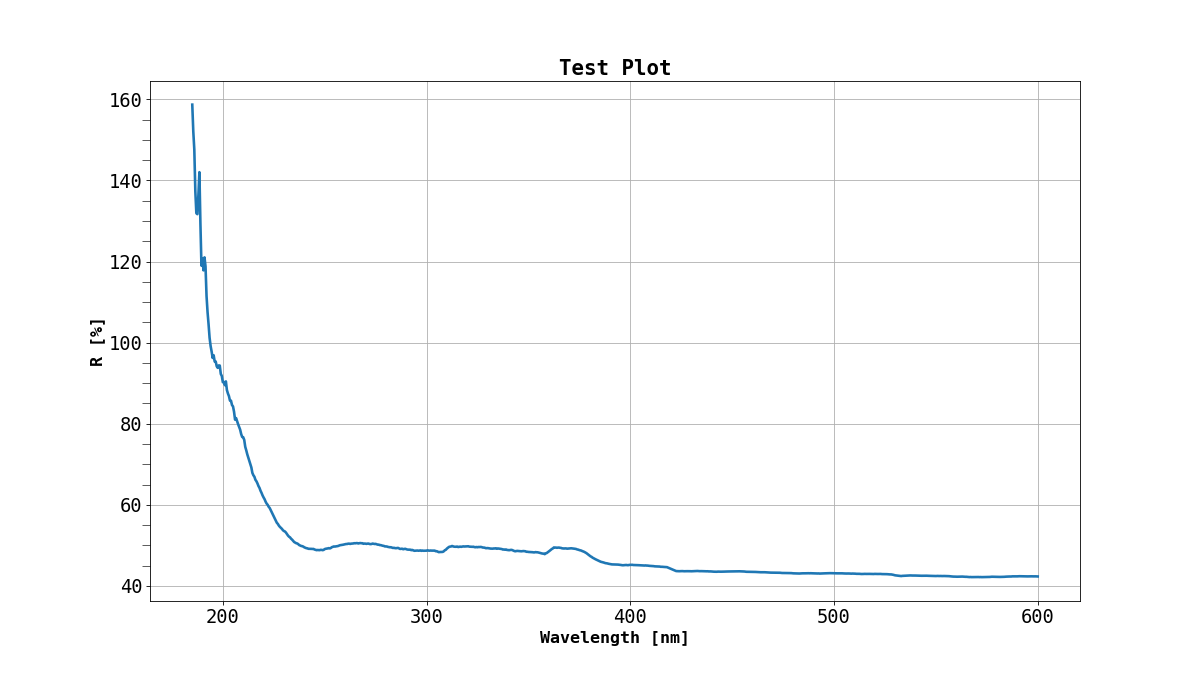

In [12]:
## ----------------------------------------- data -----------------------------------------
test_filename = 'pen_argset_B_back_corner4_gentlePress.txt'
test_data = pd.read_csv(path.join(data_dir, test_filename), delimiter="\t", decimal=",", skiprows=[0,1], names=['wavelength', 'R'])
# test_data
## ----------------------------------------- test plot -----------------------------------------
plt.close(1)
fig1, ax1 = plt.subplots(num=1, figsize=[16,9])
ax1.plot(test_data['wavelength'], test_data['R'])
## plt.locator_params(axis='x', nbins=5)
ax1.set_title('Test Plot')
ax1.set_xlabel('Wavelength [nm]')
ax1.set_ylabel('R [%]')
# ax1.set_ylim(2.9, 3.7)
ax1.grid()
# ax1.legend(loc='upper left')
# fig1.savefig(path.join(output_dir, 'plots','test_plot.png'))
# ax_inset = inset_axes(ax1, width="45%", height="45%", loc='center',
#                         bbox_to_anchor=(-0.10, -0.05, 1, 1), 
#                         bbox_transform=ax1.transAxes);
# ax_inset.plot(test_data['wavelength'], test_data['R'], color='red')
# ax_inset.set_ylim(90, 120)
# ax_inset.set_xlim(185, 230)
# ax_inset.grid()

## ----------------------------------------- Scatter and Error plots -----------------------------------------
# fig1, ax1 = plt.subplots()

# # ax1.scatter(tau3_file['index'], tau3_file['ch0']/1000, s=128, alpha=0.5, label='0', color='C0')
# # ax1.scatter(tau3_file['index'], tau3_file['ch1']/1000, s=128, alpha=0.5, label='1', color='C1')
# # ax1.scatter(tau3_file['index'], tau3_file['ch2']/1000, s=128, alpha=0.5, label='2', color='C2')

# ax1.errorbar(tau3_file['index'], tau3_file['ch0']/1000, \
#             yerr = np.sqrt(tau3_file['ch0_chisqr'])*tau3_file['ch0_sigma']/1000, fmt='o', elinewidth=1.0, \
#             linestyle='none', ecolor='C0', label='0') #'#ADFF2F'
# ax1.errorbar(tau3_file['index'], tau3_file['ch1']/1000, \
#             yerr = np.sqrt(tau3_file['ch1_chisqr'])*tau3_file['ch1_sigma']/1000, fmt='o', elinewidth=1.0, \
#             linestyle='none', ecolor='C1', label='1') #'#ADFF2F'
# ax1.errorbar(tau3_file['index'], tau3_file['ch2']/1000, \
#             yerr = np.sqrt(tau3_file['ch2_chisqr'])*tau3_file['ch2_sigma']/1000, fmt='o', elinewidth=1.0, \
#             linestyle='none', ecolor='C2', label='2') #'#ADFF2F'

# ## plt.locator_params(axis='x', nbins=5)
# ax1.set_xticks([1.0, 2.0, 3.0, 4.0, 5.0])
# ax1.set_xlabel('Run part')
# ax1.set_xticklabels(['$1^{st}$','$2^{nd}$','$3^{rd}$','$4^{th}$','$5^{th}$'])
# ax1.set_ylabel('Triplet lifetime [$\\mu$s]')
# ax1.set_ylim(2.9, 3.7)
# ax1.grid()
# ax1.legend(loc='upper left')
# fig1.savefig(path.join(output_dir, 'plots','tau3_PEN.png'))

<h2 style='color:lightgreen; text-align:center'> Multiple samples full range</h2>

In [13]:
# pen_teonex_Q51_old_*.txt
# pen_teonex_Q51_*.txt
# PEN_Q51_50um_argset_*.txt
# PEN_Q53_UZH_*.txt
# no_sample_attempt2.txt
# reference_BaSO4_test_2.txt

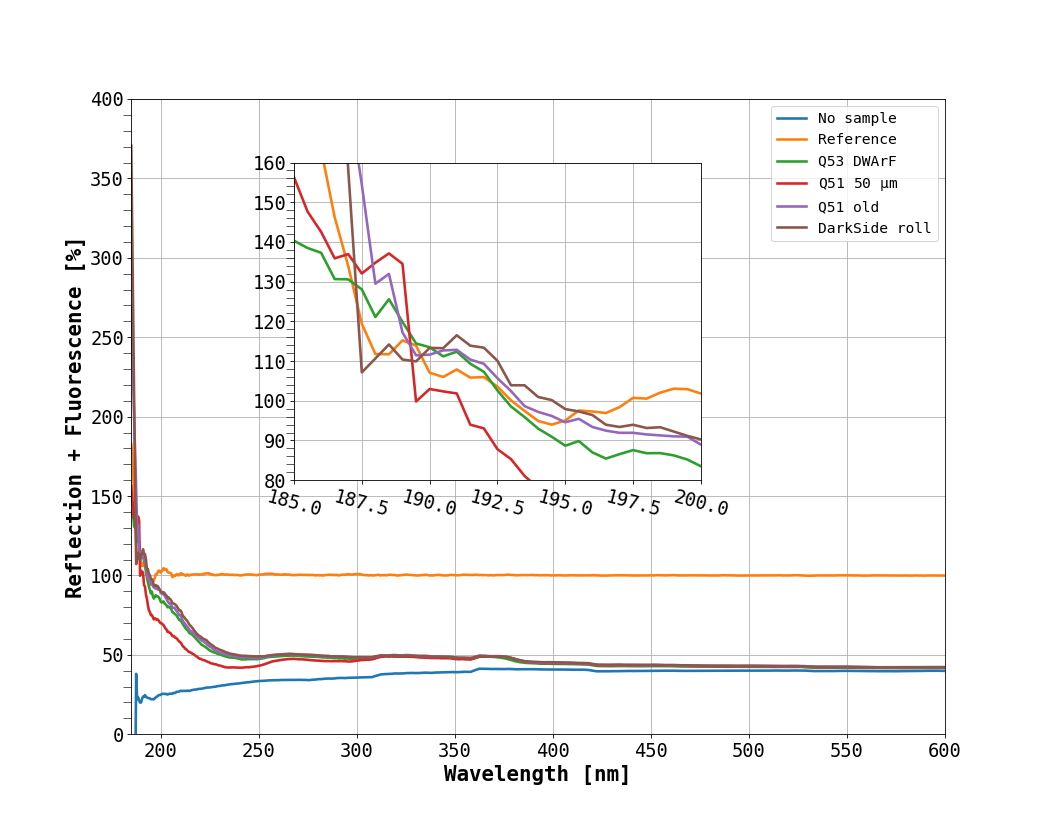

In [14]:
## add_line(fig2, ax2, test_data)
# del fig2, ax2, ax_inset2
fig2, ax2, ax_inset2 = create_fig_with_inset(2)

data_filename_ls = ['no_sample_attempt2.txt', 'reference_BaSO4_test_2.txt', 'PEN_Q53_UZH_spot2.txt', 'PEN_Q51_50um_argset_commissioning_22042024_attempt2.txt', 'pen_teonex_Q51_old_spot3.txt', 'pen_argset_A_centre_front.txt']
wls_label_ls = ['No sample', 'Reference', 'Q53 DWArF', 'Q51 50 $\\mu$m', 'Q51 old', 'DarkSide roll']

# for index_d, datafile_path in enumerate(datafile_path_ls):
for index_d, data_filename in enumerate(data_filename_ls):
    # datafile = pd.read_csv(path.join(data_dir, datafile_path), delimiter="\t", decimal=",", skiprows=[0,1], names=['wavelength', 'R'])
    datafile = pd.read_csv(path.join(data_dir, data_filename), delimiter="\t", decimal=",", skiprows=[0,1], names=['wavelength', 'R'])
    add_line(fig2, ax2, ax_inset2, datafile, wls_label_ls[index_d], colorstr=f'C{index_d}')

In [15]:
# fig2.savefig('../plots/reflectivity_wavelength_6cases.png')

In [16]:
# plt.close(fig2)
# fig2

In [17]:
# del fig2

<h2 style='color:lightgreen; text-align:center'> Scatterplot: DS-20k and 2PAC </h2>

<!-- <p> -->
<span style='color:blue'>Consistency of DarkSide-20k veto PEN with pre-production samples (2PAC)</span> <br>

- scatter plot - x axis sample type (2PAC, DS A, B, C), y axis: \%R at 190 nm 
- histogram for all DS values (a, b, c) at 190 nm, fit a gauss to it - show chi2.ndf, mean with uncertainty, sigma with uncertainty
- table with for each sample type (2pac, a, b, c, a+b+c jointly) : mean, standard deviation (sigma), and Standard Error of the Mean (standard deviation / sqrt (number of samples) or from the fit )
<!-- </p> -->

Text(0, 0.5, 'Reflection + Fluorescence at 190 nm[%]')

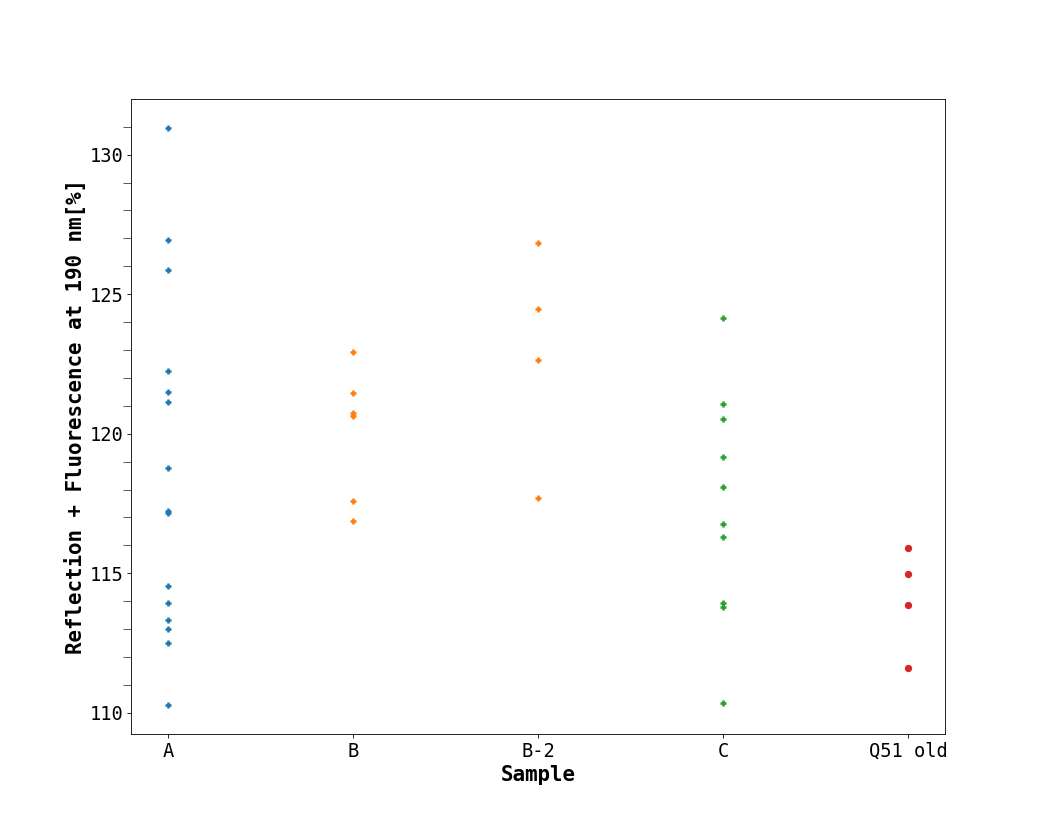

In [18]:
# del fig3, ax3, ax_inset3
# fig3, ax3= plt.subplots(2, 1, figsize=[14, 11], dpi=75);
fig3, ax3= plt.subplots(1, 1, figsize=[14, 11], dpi=75);
# R190_ls = []
filename_pattern = 'pen_argset_*.txt'
datafile_path_ls = glob(path.join(data_dir, filename_pattern))

# for index_d, datafile_path in enumerate(datafile_path_ls):
#     datafile = pd.read_csv(datafile_path, delimiter="\t", decimal=",", skiprows=[0,1], names=['wavelength', 'R'])
#     ax3[0].scatter(index_d, (datafile['R'][datafile['wavelength']==190]), marker='+', label='DarkSide-20k roll')

# filename_pattern = 'pen_teonex_Q51_old_*.txt'
# datafile_path_ls = glob(path.join(data_dir, filename_pattern))

# for index_e, datafile_path in enumerate(datafile_path_ls):
#     datafile = pd.read_csv(datafile_path, delimiter="\t", decimal=",", skiprows=[0,1], names=['wavelength', 'R'])
#     ax3[0].scatter(index_d + index_e+1, (datafile['R'][datafile['wavelength']==190]), marker='o', label='Old')

# ax3[0].set_xlabel('index', fontsize=20)
# ax3[0].set_ylabel('Reflection + Fluorescence at 190 nm[%]', fontsize=20)
# # ax3[0].legend()
filename_pattern_ls = ['pen_argset_A*.txt', 'pen_argset_B*.txt', 'pen_argset_otherB_*.txt', 'pen_argset_C*.txt', 'pen_teonex_Q51_old_*.txt']
# cntr = 0
colour_ls = ['C0', 'C1', 'C1', 'C2', 'C3']
marker_ls = ['+', '+', '+', '+','o']
label_ls = ['A', 'B', 'B-2', 'C', 'Q51 old']

for index_file, filename_pattern in enumerate(filename_pattern_ls):
    PEN_R190_ls = []
    datafile_path_ls = glob(path.join(data_dir, filename_pattern))
    for index_d, datafile_path in enumerate(datafile_path_ls):
        datafile = pd.read_csv(datafile_path, delimiter="\t", decimal=",", skiprows=[0,1], names=['wavelength', 'R'])
        PEN_R190_ls.append(datafile['R'][datafile['wavelength']==190])
        # ax3[1].scatter(cntr, (datafile['R'][datafile['wavelength']==190]), marker=marker_ls[index_file], color=colour_ls[index_file])
        ax3.scatter(label_ls[index_file], (datafile['R'][datafile['wavelength']==190].iloc[0]), marker=marker_ls[index_file], color=colour_ls[index_file])
        # cntr += 1
    # ax3[1].scatter(np.arange(len(PEN_R190_ls))+ index_file+1, PEN_R190_ls, marker=marker_ls[index_file], color=colour_ls[index_file], label=filename_pattern.split(sep='*')[0])
# ax3[1].legend()
ax3.set_xlabel('Sample', fontsize=20)
ax3.set_ylabel('Reflection + Fluorescence at 190 nm[%]', fontsize=20)

In [19]:
# fig3.savefig('../plots/scatter_reflectivity_at_190nm.png')

<h2 style='color:lightgreen; text-align:center'> Histogram: DS-20k and 2PAC </h2>

In [20]:
filename_pattern_ls = ['pen_argset_A*.txt', 'pen_argset_B*.txt', 'pen_argset_otherB_*.txt', 'pen_argset_C*.txt']

PEN_R190_ls = []

for index_file, filename_pattern in enumerate(filename_pattern_ls):
    datafile_path_ls = glob(path.join(data_dir, filename_pattern))
    for index_d, datafile_path in enumerate(datafile_path_ls):
        datafile = pd.read_csv(datafile_path, delimiter="\t", decimal=",", skiprows=[0,1], names=['wavelength', 'R'])
        PEN_R190_ls.append(datafile['R'][datafile['wavelength']==190].iloc[0])

Text(0, 0.5, 'counts')

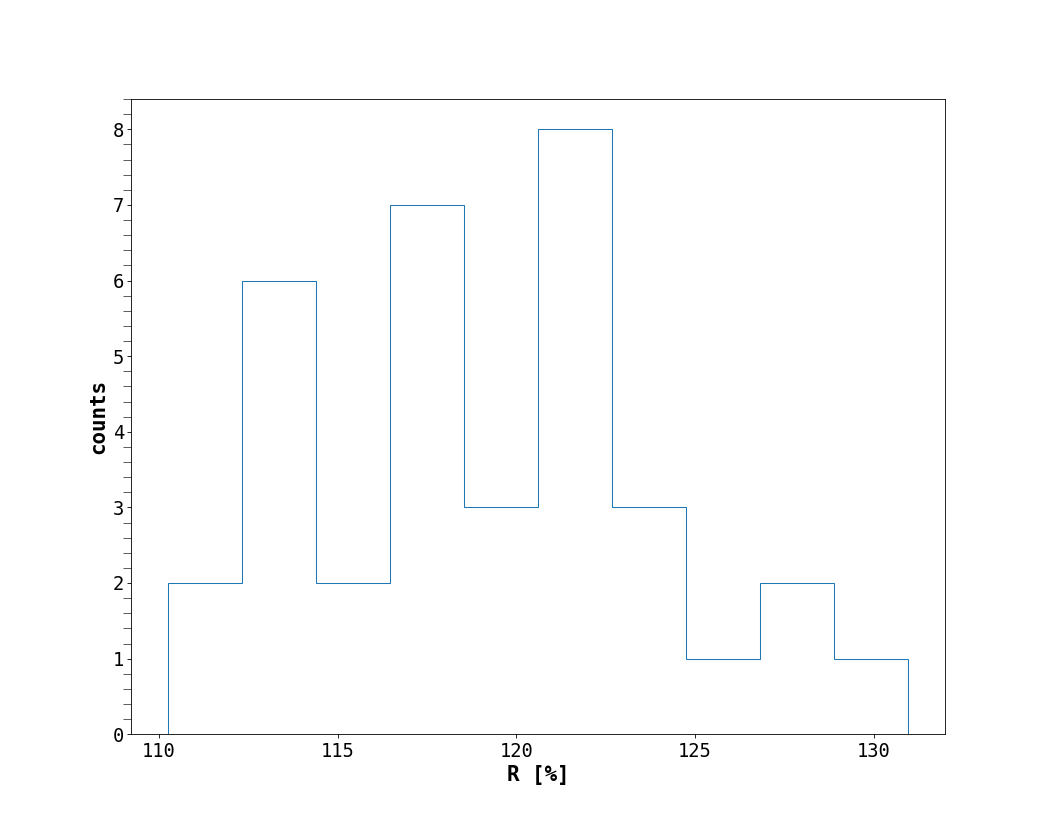

In [21]:
fig4, ax4= plt.subplots(1, 1, figsize=[14, 11], dpi=75)

hist_content, hist_edges, _histObjects = ax4.hist(PEN_R190_ls, bins=10, histtype='step')
ax4.set_xlabel('R [%]', fontsize=20)
ax4.set_ylabel('counts', fontsize=20)

In [22]:
p0_input = [120, 4.9, 10]

fitted_parameters, _pcov = curve_fit(f_gauss, 
                            hist_edges[:-1], hist_content, \
                            # hist_edges[x_range], hist_content[x_range], \
                            p0 = p0_input,
                            )
ax4.plot(hist_edges, f_gauss(hist_edges, *fitted_parameters))

red_chisqr_value = red_chisq(hist_content, \
    f_gauss(hist_edges[:-1], *fitted_parameters), fitted_parameters
    )

text_in_box = AnchoredText(f"statistics = {int(np.sum(hist_content))}" '\n$\\chi^{2}/\\nu$' f" = {red_chisqr_value:.2f}" '\n$\mu$' f' = {fitted_parameters[0]:.3f}' '\n$\sigma$' f' = {fitted_parameters[1]:.3f}',\
                                        prop=dict(size=18), loc='upper right')
ax4.add_artist(text_in_box)

<h3> iMinuit chisquare fit </h3>

In [23]:
from iminuit import Minuit
from iminuit.cost import LeastSquares
from iminuit.cost import BinnedNLL

cost_func = LeastSquares(hist_edges[:-1], hist_content, np.sqrt(hist_content), f_gauss)
p0_input = [120, 4.9, 50]

m2 = Minuit(cost_func, *p0_input)

m2.limits["f_mean"] = (90, None)
m2.limits["f_sigma"] = (0, 10)
m2.limits["f_k"] = (None, 100)

In [24]:
m2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.326 (χ²/ndof = 1.2)      │              Nfcn = 70               │
│ EDM = 1.69e-05 (Goal: 0.0002)    │            time = 0.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ f_mean  │   117.2   │    1.9    │            │            │   90    │         │       │
│ 1 │ f_sigma │    6.3    │    2.1    │            │            │    0    │   10    │       │
│ 2 │ f_k     │    63     │    16     │            │            │         │   100   │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────────┬─────────────────────────┐
│         │  f_mean f_sigma     f_k │
├─────────┼─────────────────────────┤
│  f_mean │    3.46    -2.2   -13.1 │
│ f_sigma │    -2.2    4.66      21 │
│     f_k │   -13.1      21     244 │
└─────────┴─────────────────────────┘

In [25]:
# m2.params['f_mean'].value

<h3>iminuit log-likelihood</h3>

In [26]:
# cost_func = np.sum(f_gauss(hist_edges[:-1], *p0_input) - hist_content) # custom_cost

# cost_func = BinnedNLL(hist_content, hist_edges, f_gauss, verbose=0, use_pdf='numerical')

from scipy.stats import norm
def f_gauss_imi(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

cost_func = BinnedNLL(hist_content, hist_edges, f_gauss_imi, verbose=0, use_pdf='numerical')
p0_input = [120, 4.9]
# p0_input = [120, 4.9, 50]

m3 = Minuit(cost_func, *p0_input)

In [27]:
# m3.limits["f_mean"] = (90, None)
# m3.limits["f_sigma"] = (0, 10)
# m3.limits["f_k"] = (None, 100)

m3.limits["mu"] = (90, None)
m3.limits["sigma"] = (0, 10)
# m3.limits["k"] = (None, 100)

In [28]:
m3.migrad();

In [29]:
m3.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 12.36 (χ²/ndof = 1.5)      │              Nfcn = 45               │
│ EDM = 1.21e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │   119.2   │    0.8    │            │            │   90    │         │       │
│ 1 │ sigma │    4.7    │    0.6    │            │            │    0    │   10    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────┐
│       │    mu sigma │
├───────┼─────────────┤
│    mu │ 0.649  0.00 │
│ sigma │  0.00  0.33 │
└───────┴─────────────┘

<h2 style='color:lightgreen; text-align:center'> Histogram: DS-20k Front and Back </h2>

In [31]:
filename_pattern_ls = ['*Bottom*.txt']
PEN_R190_Bottom_ls = []
PEN_R190_Top_ls = []

for index_file, filename_pattern in enumerate(filename_pattern_ls):
    datafile_path_ls = glob(path.join(data_dir, filename_pattern))
    for index_d, datafile_path in enumerate(datafile_path_ls):
        # print(f"{index_d}, {datafile_path.split(sep='/')[-1]}")
        datafile = pd.read_csv(datafile_path, delimiter="\t", decimal=",", skiprows=[0,1], names=['wavelength', 'R'])
        PEN_R190_Bottom_ls.append(datafile['R'][datafile['wavelength']==190].iloc[0])

filename_pattern_ls = ['*Top*.txt']
for index_file, filename_pattern in enumerate(filename_pattern_ls):
    datafile_path_ls = glob(path.join(data_dir, filename_pattern))
    for index_d, datafile_path in enumerate(datafile_path_ls):
        # print(f"{index_d}, {datafile_path.split(sep='/')[-1]}")
        datafile = pd.read_csv(datafile_path, delimiter="\t", decimal=",", skiprows=[0,1], names=['wavelength', 'R'])
        PEN_R190_Top_ls.append(datafile['R'][datafile['wavelength']==190].iloc[0])

Text(0.5, 1.0, 'Bottom: A and C')

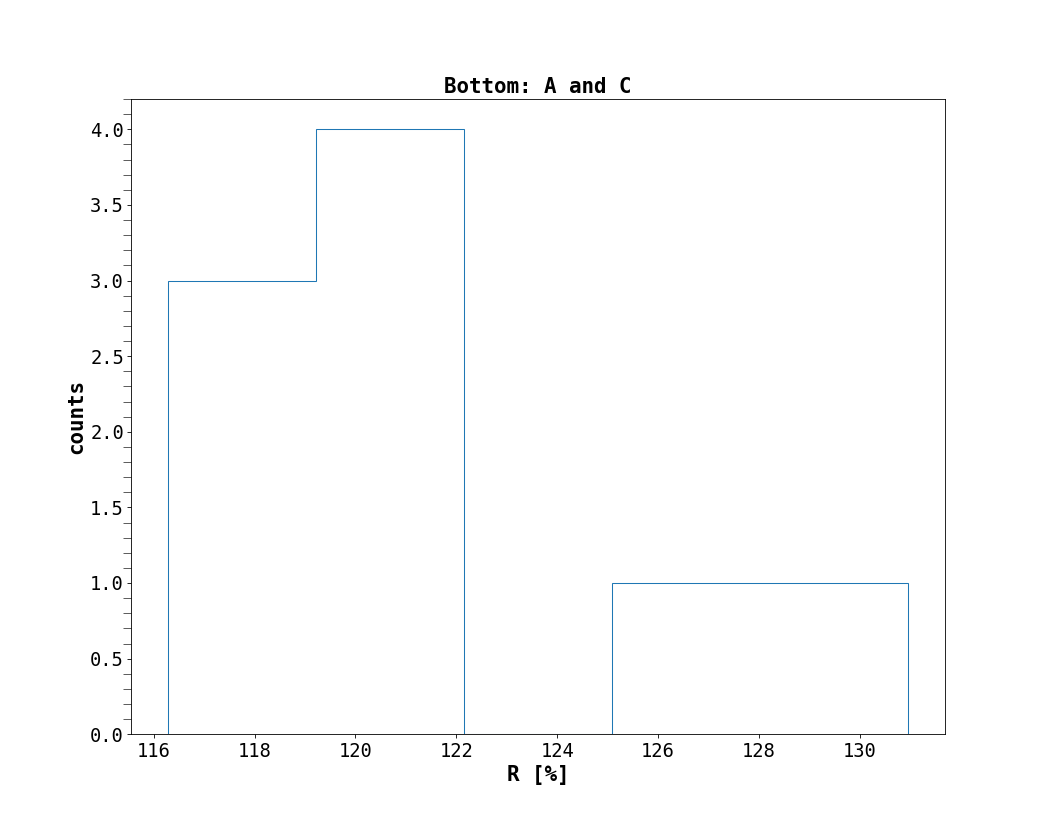

In [32]:
fig5, ax5= plt.subplots(1, 1, figsize=[14, 11], dpi=75)

hist_content, hist_edges, _histObjects = ax5.hist(PEN_R190_Bottom_ls, bins=5, histtype='step')
ax5.set_xlabel('R [%]', fontsize=20)
ax5.set_ylabel('counts', fontsize=20)
ax5.set_title('Bottom: A and C')

In [33]:
text_in_box = AnchoredText(f"statistics = {int(np.sum(hist_content))}" '\n$\mu$' f' = {np.mean(PEN_R190_Bottom_ls):.3f}' '\n$\sigma$' f' = {np.std(PEN_R190_Bottom_ls):.3f}', 
                        #    '\n$\\chi^{2}/\\nu$' f" = {red_chisqr_value:.2f}" '\n$\mu$' f' = {fitted_parameters[0]:.3f}' '\n$\sigma$' f' = {fitted_parameters[1]:.3f}',\
                                        prop=dict(size=18), loc='upper right')
ax5.add_artist(text_in_box)

Text(0.5, 1.0, 'TopSurface: A and C')

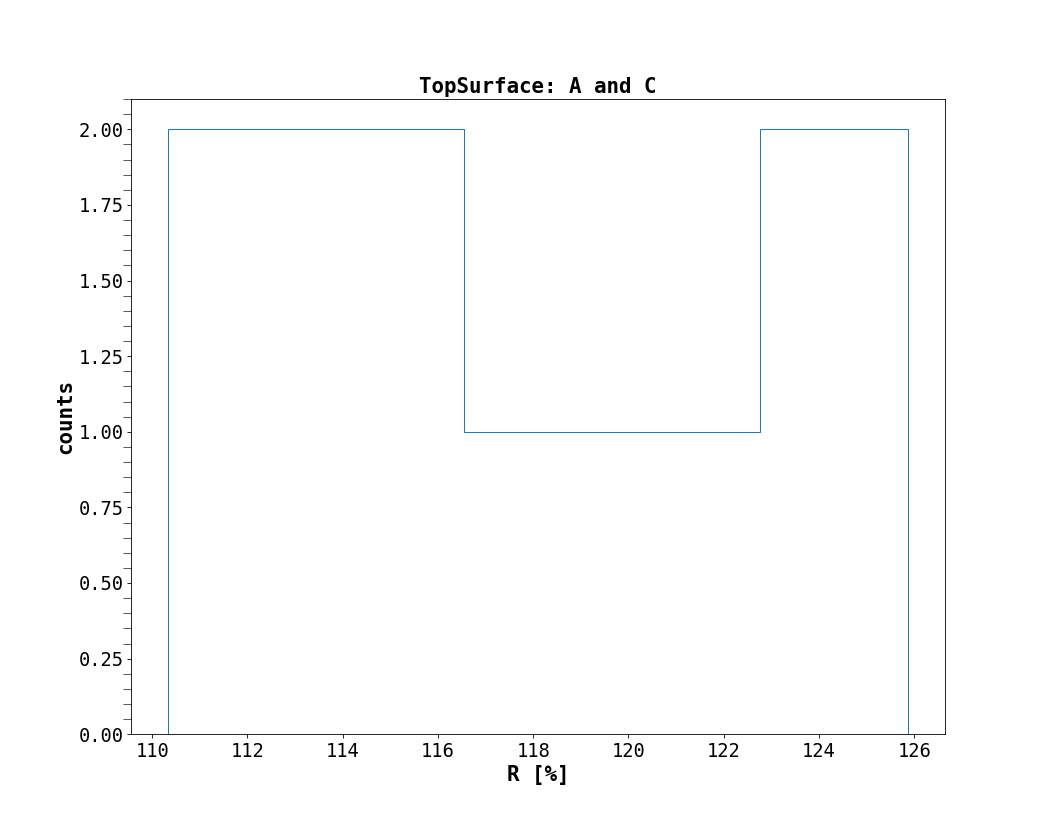

In [34]:
fig6, ax6= plt.subplots(1, 1, figsize=[14, 11], dpi=75)

hist_content, hist_edges, _histObjects = ax6.hist(PEN_R190_Top_ls, bins=5, histtype='step')
ax6.set_xlabel('R [%]', fontsize=20)
ax6.set_ylabel('counts', fontsize=20)
ax6.set_title('TopSurface: A and C')

In [35]:
text_in_box = AnchoredText(f"statistics = {int(np.sum(hist_content))}" '\n$\mu$' f' = {np.mean(PEN_R190_Top_ls):.3f}' '\n$\sigma$' f' = {np.std(PEN_R190_Top_ls):.3f}', 
                        #    '\n$\\chi^{2}/\\nu$' f" = {red_chisqr_value:.2f}" '\n$\mu$' f' = {fitted_parameters[0]:.3f}' '\n$\sigma$' f' = {fitted_parameters[1]:.3f}',\
                                        prop=dict(size=18), loc='lower center')
ax6.add_artist(text_in_box)

<h2 style='color:lightgreen; text-align:center'> Histogram: DS-20k Centre and Edges </h2>

In [36]:
filename_pattern_ls = ['*_B_*.txt']
PEN_R190_Centre_ls = []
PEN_R190_Edges_ls = []

for index_file, filename_pattern in enumerate(filename_pattern_ls):
    datafile_path_ls = glob(path.join(data_dir, filename_pattern))
    for index_d, datafile_path in enumerate(datafile_path_ls):
        # print(f"{index_d}, {datafile_path.split(sep='/')[-1]}")
        datafile = pd.read_csv(datafile_path, delimiter="\t", decimal=",", skiprows=[0,1], names=['wavelength', 'R'])
        PEN_R190_Centre_ls.append(datafile['R'][datafile['wavelength']==190].iloc[0])

filename_pattern_ls = ['*_A_*.txt', '*_C_*.txt']
for index_file, filename_pattern in enumerate(filename_pattern_ls):
    datafile_path_ls = glob(path.join(data_dir, filename_pattern))
    for index_d, datafile_path in enumerate(datafile_path_ls):
        # print(f"{index_d}, {datafile_path.split(sep='/')[-1]}")
        datafile = pd.read_csv(datafile_path, delimiter="\t", decimal=",", skiprows=[0,1], names=['wavelength', 'R'])
        PEN_R190_Edges_ls.append(datafile['R'][datafile['wavelength']==190].iloc[0])

Text(0.5, 1.0, 'Centre')

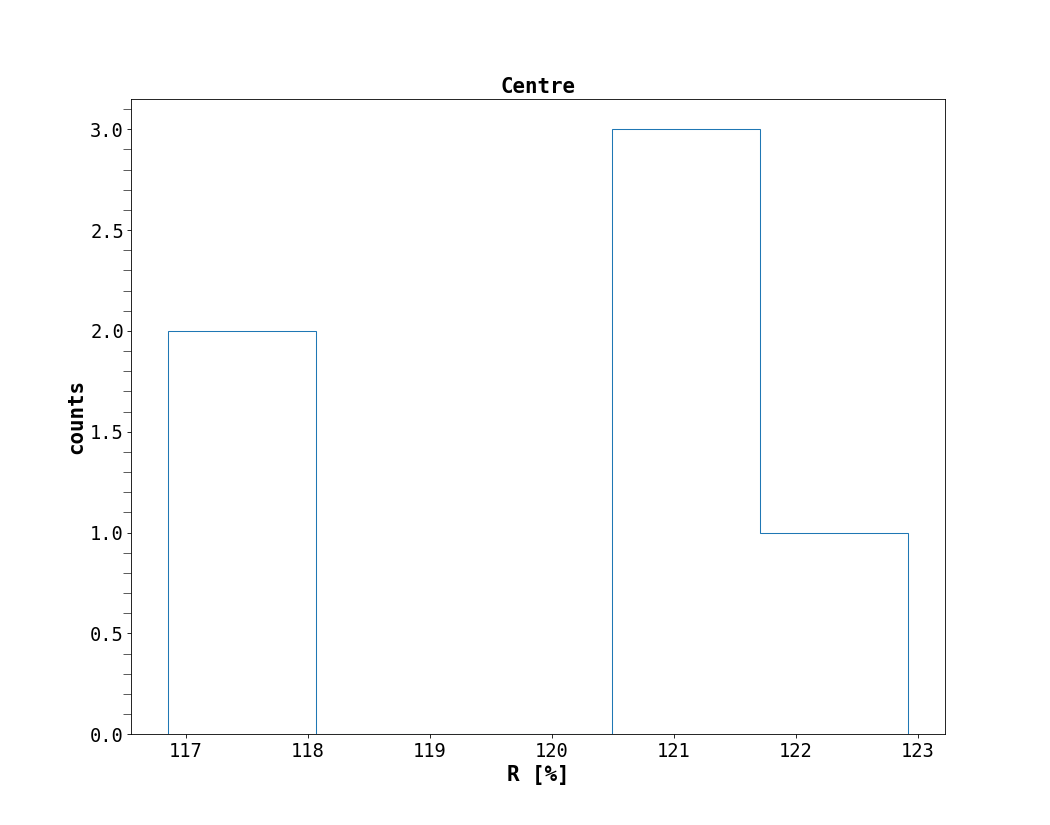

In [37]:
fig7, ax7= plt.subplots(1, 1, figsize=[14, 11], dpi=75)

hist_content, hist_edges, _histObjects = ax7.hist(PEN_R190_Centre_ls, bins=5, histtype='step')
ax7.set_xlabel('R [%]', fontsize=20)
ax7.set_ylabel('counts', fontsize=20)
ax7.set_title('Centre')

In [38]:
text_in_box = AnchoredText(f"statistics = {int(np.sum(hist_content))}" '\n$\mu$' f' = {np.mean(PEN_R190_Centre_ls):.3f}' '\n$\sigma$' f' = {np.std(PEN_R190_Centre_ls):.3f}',
                        #    '\n$\\chi^{2}/\\nu$' f" = {red_chisqr_value:.2f}" '\n$\mu$' f' = {fitted_parameters[0]:.3f}' '\n$\sigma$' f' = {fitted_parameters[1]:.3f}',\
                                        prop=dict(size=18), loc='upper right')
ax7.add_artist(text_in_box)

Text(0.5, 1.0, 'Edges')

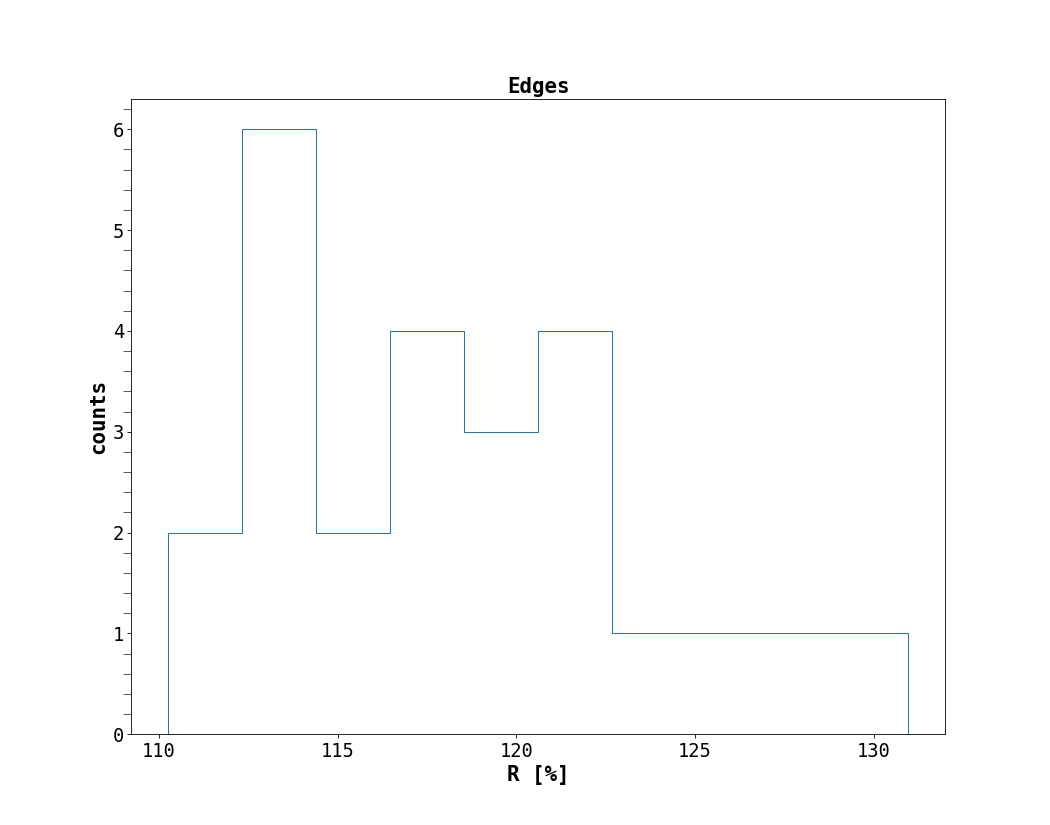

In [39]:
fig8, ax8= plt.subplots(1, 1, figsize=[14, 11], dpi=75)

hist_content, hist_edges, _histObjects = ax8.hist(PEN_R190_Edges_ls, bins=10, histtype='step')
ax8.set_xlabel('R [%]', fontsize=20)
ax8.set_ylabel('counts', fontsize=20)
ax8.set_title('Edges')

In [40]:
text_in_box = AnchoredText(f"statistics = {int(np.sum(hist_content))}" '\n$\mu$' f' = {np.mean(PEN_R190_Edges_ls):.3f}' '\n$\sigma$' f' = {np.std(PEN_R190_Edges_ls):.3f}',
                        #    '\n$\\chi^{2}/\\nu$' f" = {red_chisqr_value:.2f}" '\n$\mu$' f' = {fitted_parameters[0]:.3f}' '\n$\sigma$' f' = {fitted_parameters[1]:.3f}',\
                                        prop=dict(size=18), loc='upper right')
ax8.add_artist(text_in_box)

In [41]:
# fig9, ax9= plt.subplots(1, 1, figsize=[14, 11], dpi=75)